In [20]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def visualize_csv_output(path, output_path = "./solver_output_plot.png"):
    data = pd.read_csv(path, header=None)
    x = np.arange(data.shape[1])
    y = np.arange(data.shape[0])
    X, Y = np.meshgrid(x, y)
    Z = data.values
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])
    fig.update_layout(title='Output Plot', autosize=True,
                      scene=dict(
                          xaxis_title='X Axis',
                          yaxis_title='Y Axis',
                          zaxis_title='Height (Z)'),
                      margin=dict(l=65, r=50, b=65, t=90))

    fig.show()
    fig.write_image(output_path)
    print(f"Figure saved as {output_path}")


### Simple Rectangle Reference

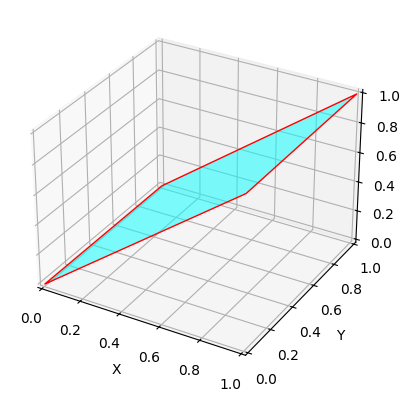

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


vertices = np.array([
    [0, 0, 0],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 0],
])

faces = [[vertices[0], vertices[1], vertices[2], vertices[3]]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rectangle = Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5)

ax.add_collection3d(rectangle)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Simple Rectangle Result

In [23]:
visualize_csv_output("../output/polygon_solver_out.csv","./simple_rectangle_output_plot.png" )

Figure saved as ./simple_rectangle_output_plot.png


### Saddle Point Reference

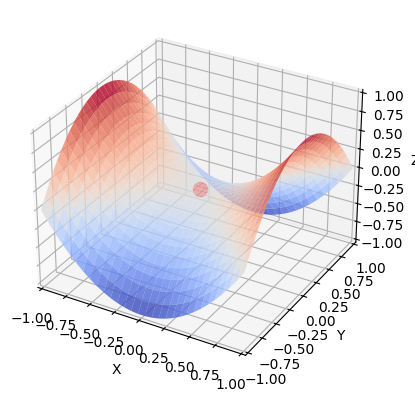

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Define the grid for x and y
# x = np.linspace(-1, 1, 30)
# y = np.linspace(-1, 1, 30)

# # Create a meshgrid for x and y
# X, Y = np.meshgrid(x, y)

# # Define the saddle point surface z = x^2 - y^2
# Z = X**2 - Y**2

# # Create the figure and 3D axis
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot the surface with a colormap
# ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none', alpha=0.8)

# # Highlight the saddle point (at x=0, y=0)
# ax.scatter(0, 0, 0, color='r', s=100)  # Mark saddle point at (0,0,0)

# # Set axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Set axis limits
# ax.set_xlim([-1, 1])
# ax.set_ylim([-1, 1])
# ax.set_zlim([-1, 1])

# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the grid for x and y
x = np.linspace(-1, 1, 30)  # 30 points between -1 and 1 for x-axis
y = np.linspace(-1, 1, 30)  # 30 points between -1 and 1 for y-axis

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Define the saddle point surface z = x^2 - y^2
Z = X**2 - Y**2

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a colormap
ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none', alpha=0.8)

# Highlight the saddle point (at x=0, y=0)
ax.scatter(0, 0, 0, color='r', s=100)  # Mark saddle point at (0,0,0)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Show the plot
plt.show()


### Saddle Point Result

In [38]:
visualize_csv_output("../solver/saddlePoint.csv","./saddle_point_output_plot.png" )

Figure saved as ./saddle_point_output_plot.png


### Sinusoid Reference

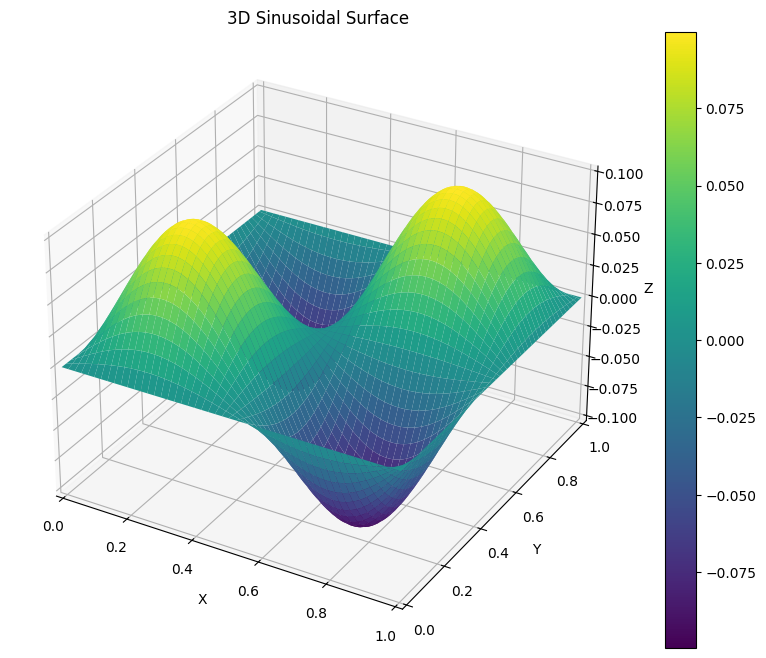

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
num_points = 100
amplitude = 0.1
frequency = 2 * np.pi

# Generate the 3D sinusoidal surface
x = np.linspace(0, 1, num_points)
y = np.linspace(0, 1, num_points)
X, Y = np.meshgrid(x, y)
Z = amplitude * np.sin(frequency * X) * np.sin(frequency * Y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Set plot limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(-amplitude, amplitude)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Sinusoidal Surface')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()

In [34]:
visualize_csv_output("../solver/out.csv","./sinusoid_output_plot.png" )

Figure saved as ./sinusoid_output_plot.png


In [29]:
visualize_csv_output("../output/sample_out.csv","./sinusoid_output_plot.png" )

Figure saved as ./sinusoid_output_plot.png
